# **Proyek Machine Learning Terapan**

Proyek System Recommendations: **Movie**
- Nama: **Luqman Hakim**
- Email: luqmanxhakim22042002@gmail.com
- Id Dicoding:2608610

# Data Loading

In [1]:
from google.colab import files
files.upload()  # Pilih file 'kaggle.json' yang telah diunduh

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luqmanxhakim","key":"15f3b1854aea82ada0b6d7c6b3189972"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d snehal1409/movielens

Dataset URL: https://www.kaggle.com/datasets/snehal1409/movielens
License(s): unknown
  0% 0.00/910k [00:00<?, ?B/s]
100% 910k/910k [00:00<00:00, 729MB/s]


In [4]:
!unzip movielens.zip

Archive:  movielens.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


# Data Understanding

In [5]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from keras import layers
import tensorflow as tf
from tensorflow import keras

## Jumlah Data dari Masing-masing Dataset

In [6]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

print('Jumlah data movies: ', len(movies.movieId.unique()))
print('Jumlah data ratings: ', len(ratings.userId.unique()))

Jumlah data movies:  9125
Jumlah data ratings:  671


# Univariate Exploratory Data Analysis (EDA)

## Dataset Movies

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [8]:
print('Banyak data: ', len(movies.movieId.unique()))
print('Genre: ', movies.genres.unique())

Banyak data:  9125
Genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Documentary|IMAX' 'Children|Comedy'
 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure|Fantasy'
 'Comedy|Drama|Thriller' 'Mystery|Thriller'
 'Animation|Children|Drama|Musical|Romance' 'Crime|Mystery|Thriller'
 'Adventure|Drama' 'Drama|Mystery' 'Drama|Thriller' 'Comedy|Crime'
 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller' 'Comedy|Drama'
 'Documentary' 'Action|Crime|Drama|Thriller' 'Crime|Drama|Romance'
 'Action|Adventure|Drama' 'Act

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies.describe()

,movieId
count,9125.000000
mean,31123.291836
std,40782.633604
min,1.000000
25%,2850.000000
50%,6290.000000
75%,56274.000000
max,164979.000000


In [11]:
#Menampilkan jumlah baris dan kolom dalam dataset
movies.shape

(9125, 3)

In [12]:
# Menampilkan nilai unik pada kolom 'title'
movies.title.nunique()

9123

In [13]:
# Menampilkan nilai duplikat pada kolom 'title'
duplicate_titles = movies[movies['title'].duplicated(keep=False)]
print(duplicate_titles['title'])

2872               Hamlet (2000)
6172    War of the Worlds (2005)
7127    War of the Worlds (2005)
7151               Hamlet (2000)
Name: title, dtype: object


In [14]:
# Drop nilai duplikat pada kolom 'title'
movies.drop_duplicates(subset='title', keep='first', inplace=True)
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [15]:
# Mengubah nama kolom 'title'
movies.rename(columns={'title':'title_year'}, inplace=True)
movies

,movieId,title_year,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [16]:
# Extract kolom 'title' untuk memisahkan dengan 'year'
def extract_title(title_year):

  year = title_year[len(title_year)-5:len(title_year)-1]

  if year.isnumeric():
    title_no_year = title_year[:len(title_year)-7]
    return title_no_year

  else:
    return title_year

In [17]:
def extract_year(title_year):

  year = title_year[len(title_year)-5:len(title_year)-1]

  if year.isnumeric():
    return year
    year = int(year)

  else:
    return np.nan

In [18]:
movies['title_year'] = movies['title_year'].apply(lambda x: x.strip())
movies['title'] = movies['title_year'].apply(extract_title)
movies['year'] = movies['title_year'].apply(extract_year)
movies.drop(['title_year'], axis=1, inplace=True)

In [19]:
movies.head()

,movieId,genres,title,year
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995


In [20]:
# Memisahkan nilai-nilai pada kolom "Genres"
movies['genres'] = movies.genres.str.split('|')
movies.head()

,movieId,genres,title,year
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995
1,2,"[Adventure, Children, Fantasy]",Jumanji,1995
2,3,"[Comedy, Romance]",Grumpier Old Men,1995
3,4,"[Comedy, Drama, Romance]",Waiting to Exhale,1995
4,5,[Comedy],Father of the Bride Part II,1995


<ipython-input-21-d1ae30bebc66>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Blues_d")


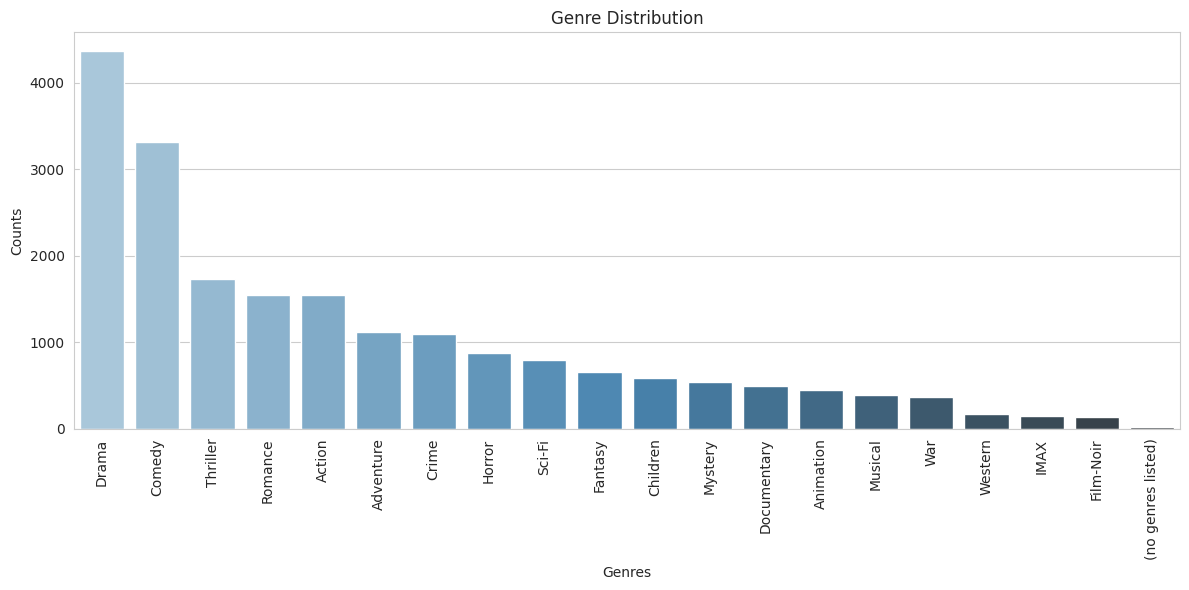

In [21]:
# Visualisasi jumlah film untuk setiap genre
movies2 = movies.explode('genres')

genre_counts = movies2['genres'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Blues_d")
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
# Menampilkan jumlah missing value pada dataset\
movies.isna().sum()

,0
movieId,0
genres,0
title,0
year,5


## Dataset Ratings

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [24]:
# Menampilkan banyaknya data ratings, jumlah user, dan rating film.
print('Jumlah user: ', len(ratings.userId.unique()))
print('Jumlah rating: ', len(ratings))
print('Rating: ', ratings.rating.unique())

Jumlah user:  671
Jumlah rating:  100004
Rating:  [2.5 3.  2.  4.  3.5 1.  5.  4.5 1.5 0.5]


In [25]:
# menampilkan 5 baris pertama dari dataset "Ratings"
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [26]:
# Pengecekan deskripsi statistik dataset ratings dengan fungsi describe().
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [27]:
# Menampilkan jumlah kolom dan baris dalam dataset
ratings.shape

(100004, 4)

In [28]:
# Menampilkan data duplikat pada dataset
ratings.duplicated().sum()

np.int64(0)

In [29]:
# menampilkan jumlah missing value pada dataset
ratings.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [30]:
# Drop kolom "timestamp"
ratings = ratings.drop('timestamp', axis=1)
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [31]:
# Menampilkan nilai unik dari variable "rating"
ratings['rating'].value_counts().sort_index(ascending=True)

,count
rating,
0.5,1101
1.0,3326
1.5,1687
2.0,7271
2.5,4449
3.0,20064
3.5,10538
4.0,28750
4.5,7723


<ipython-input-32-0bdf01889397>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Purples_d")


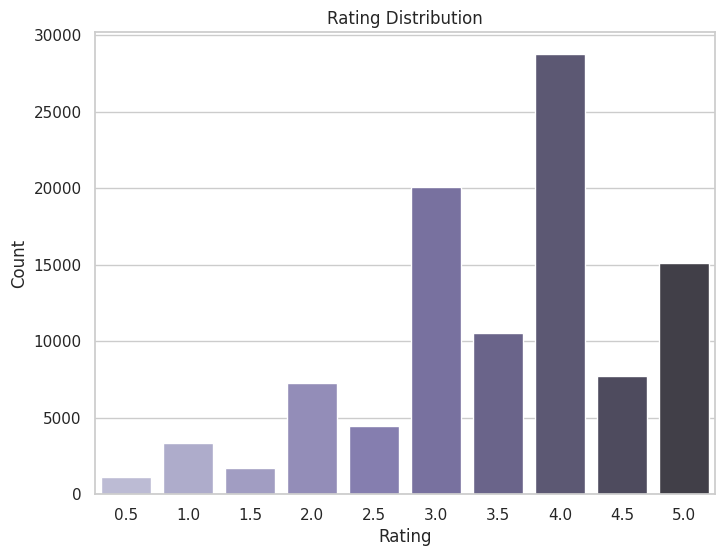

In [32]:
rating_counts = ratings['rating'].value_counts().sort_index(ascending=True)

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Purples", n_colors=len(rating_counts))

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Purples_d")

plt.xlabel('Rating')
plt.ylabel('Count')

plt.title('Rating Distribution')

plt.show()

# Data Preparation

In [33]:
movie_rating = pd.merge(movies, ratings, on='movieId')
movie_rating

,movieId,genres,title,year,userId,rating
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,7,3.0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,9,4.0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,13,5.0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,15,2.0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,19,3.0
...,...,...,...,...,...,...
99997,161944,[Drama],The Last Brickmaker in America,2001,287,5.0
99998,162376,[Drama],Stranger Things,NaN,73,4.5
99999,162542,"[Romance, Thriller]",Rustom,2016,611,5.0
100000,162672,"[Adventure, Drama, Romance]",Mohenjo Daro,2016,611,3.0


In [34]:
user_ids = list(set(movie_rating["userId"]))
user_encoded = dict(zip(user_ids, range(len(user_ids))))
userencoded_ = {v: k for k, v in user_encoded.items()}
num_users = len(user_encoded)
num_users

671

In [35]:
movie_ids = list(set(movie_rating["movieId"]))
movie_encoded = dict(zip(movie_ids, range(len(movie_ids))))
movieencoded_ = {v: k for k, v in movie_encoded.items()}
num_movies = len(movie_encoded)
num_movies

9064

In [36]:
movie_rating = movie_rating.assign(
    user=movie_rating["userId"].apply(lambda x: user_encoded[x]),
    movie=movie_rating["movieId"].apply(lambda x: movie_encoded[x])
)

movie_rating

,movieId,genres,title,year,userId,rating,user,movie
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,7,3.0,6,0
1,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,9,4.0,8,0
2,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,13,5.0,12,0
3,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,15,2.0,14,0
4,1,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,19,3.0,18,0
...,...,...,...,...,...,...,...,...
99997,161944,[Drama],The Last Brickmaker in America,2001,287,5.0,286,8783
99998,162376,[Drama],Stranger Things,NaN,73,4.5,72,8850
99999,162542,"[Romance, Thriller]",Rustom,2016,611,5.0,610,8878
100000,162672,"[Adventure, Drama, Romance]",Mohenjo Daro,2016,611,3.0,610,8890


In [37]:
movie_rating["rating"] = movie_rating["rating"].apply(np.float32)

min_rating = movie_rating["rating"].min()
max_rating = movie_rating["rating"].max()

print(f"Number of users: {num_users}, Number of Movies: {num_movies}, Min rating: {min_rating}, Max rating: {max_rating}")

Number of users: 671, Number of Movies: 9064, Min rating: 0.5, Max rating: 5.0


In [38]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Acak urutan baris
movie_rating = shuffle(movie_rating, random_state=42)

# Ekstraksi fitur dan target
x = movie_rating.loc[:, ["user", "movie"]].to_numpy()

# Normalisasi rating dengan MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(movie_rating[["rating"]]).flatten()

In [39]:
train_indices = int(0.75 * movie_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [40]:
embedding_size = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=num_users,
            output_dim=embedding_size,
            embeddings_initializer=keras.initializers.he_normal(),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(input_dim=num_users, output_dim=1)

        self.movie_embedding = layers.Embedding(
            input_dim=num_movies,
            output_dim=embedding_size,
            embeddings_initializer=keras.initializers.he_normal(),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(input_dim=num_movies, output_dim=1)

    def call(self, inputs):
        user_idx, movie_idx = inputs[:, 0], inputs[:, 1]

        user_vector = self.user_embedding(user_idx)
        user_bias = self.user_bias(user_idx)
        movie_vector = self.movie_embedding(movie_idx)
        movie_bias = self.movie_bias(movie_idx)

        interaction = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)
        result = interaction + user_bias + movie_bias

        return tf.keras.activations.sigmoid(result)

In [41]:
model = RecommenderNet(num_users, num_movies, embedding_size)

In [42]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [43]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=5,
    verbose=2,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1172/1172 - 11s - 9ms/step - loss: 0.6530 - root_mean_squared_error: 0.2583 - val_loss: 0.6125 - val_root_mean_squared_error: 0.2165
Epoch 2/5
1172/1172 - 10s - 8ms/step - loss: 0.5935 - root_mean_squared_error: 0.1974 - val_loss: 0.5947 - val_root_mean_squared_error: 0.1972
Epoch 3/5
1172/1172 - 11s - 10ms/step - loss: 0.5723 - root_mean_squared_error: 0.1716 - val_loss: 0.5925 - val_root_mean_squared_error: 0.1937
Epoch 4/5
1172/1172 - 8s - 7ms/step - loss: 0.5573 - root_mean_squared_error: 0.1510 - val_loss: 0.5937 - val_root_mean_squared_error: 0.1938
Epoch 5/5
1172/1172 - 10s - 9ms/step - loss: 0.5456 - root_mean_squared_error: 0.1334 - val_loss: 0.5960 - val_root_mean_squared_error: 0.1951


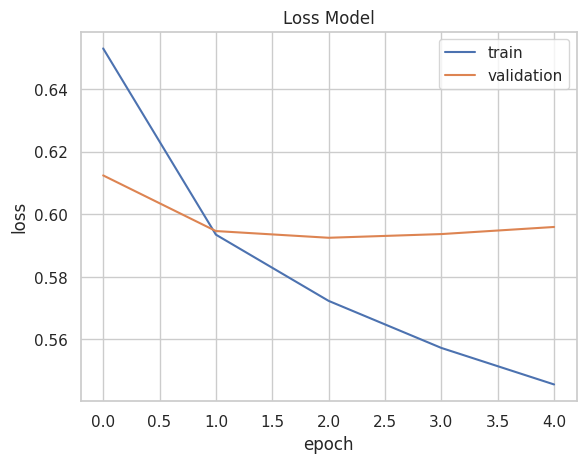

In [44]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Model")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

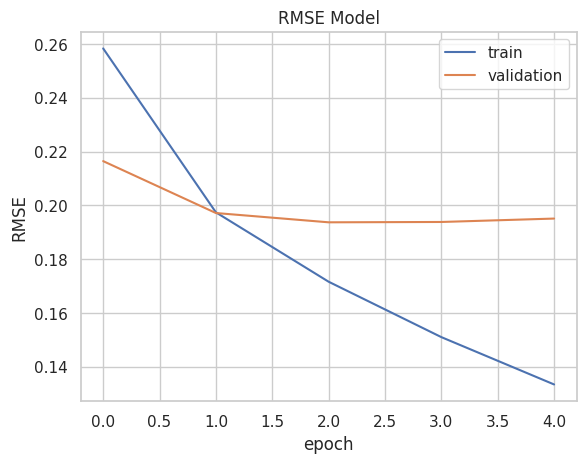

In [45]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("RMSE Model")
plt.ylabel("RMSE")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

# Modeling

Tahap pengembangan model machine learning atau modeling sistem rekomendasi dilakukan untuk memberikan hasil rekomendasi movie terbaik kepada pengguna tertentu berdasarkan rating atau penilaian pengguna terhadap movie tersebut. Tahap modeling yang dilakukan menggunakan teknik pendekatan content-based filtering recommendation dan collaborative filtering recommendation.

## Model Development - Collaborative Filtering

In [46]:
user_id = movie_rating.userId.sample(1).iloc[0]

movies_watched = movie_rating[movie_rating.userId == user_id]

movies_notwatched = movie_rating[~movie_rating["movieId"].isin(movies_watched.movieId.values)]["movieId"]
movies_notwatched = list(set(movies_notwatched).intersection(set(movie_encoded.keys())))
movies_notwatched = [[movie_encoded.get(x)] for x in movies_notwatched]

user_encoder = user_encoded.get(user_id)
user_movie_array = np.hstack(([[user_encoder]] * len(movies_notwatched), movies_notwatched))

ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movieencoded_.get(movies_notwatched[x][0]) for x in top_ratings_indices
]

print("Tampilkan Rekomendasi Film untuk {} Penonton ".format(num_users))

255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Tampilkan Rekomendasi Film untuk 671 Penonton 


In [47]:
print("====" * 9)

print("Top 5 Film dengan Rating Tertinggi")

print("====" * 9)

top_movies_user = movies_watched.sort_values(by="rating", ascending=False).head(5)
for index, row in top_movies_user.iterrows():
    print(row.title, ":", row.genres)

Top 5 Film dengan Rating Tertinggi
Guardians of the Galaxy : ['Action', 'Adventure', 'Sci-Fi']
Iron Man : ['Action', 'Adventure', 'Sci-Fi']
Star Wars: Episode VI - Return of the Jedi : ['Action', 'Adventure', 'Sci-Fi']
Avengers, The : ['Action', 'Adventure', 'Sci-Fi', 'IMAX']
Lord of the Rings: The Return of the King, The : ['Action', 'Adventure', 'Drama', 'Fantasy']


In [48]:
print("====" * 6)

print("Top 10 Rekomendasi Film")

print("====" * 6)

recommended_movie_ids = []
for x in top_ratings_indices:
    movie_id = movieencoded_.get(movies_notwatched[x][0])
    if movie_id not in recommended_movie_ids:
        recommended_movie_ids.append(movie_id)

movie_rating_unique = movie_rating.drop_duplicates(subset="movieId")
recommended_movies = movie_rating_unique[movie_rating_unique["movieId"].isin(recommended_movie_ids)].head(10)
for index, row in recommended_movies.iterrows():
    print(row.title, ":", row.genres)

Top 10 Rekomendasi Film
Get Shorty : ['Comedy', 'Crime', 'Thriller']
Hannibal : ['Horror', 'Thriller']
Firm, The : ['Drama', 'Thriller']
Godfather: Part II, The : ['Crime', 'Drama']
Star Trek IV: The Voyage Home : ['Adventure', 'Comedy', 'Sci-Fi']
Shawshank Redemption, The : ['Crime', 'Drama']
Lock, Stock & Two Smoking Barrels : ['Comedy', 'Crime', 'Thriller']
Big Hero 6 : ['Action', 'Animation', 'Comedy']
Sling Blade : ['Drama']
Intouchables : ['Comedy', 'Drama']


<ipython-input-49-714e4ef0d7ea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings, y=titles, palette=palette)


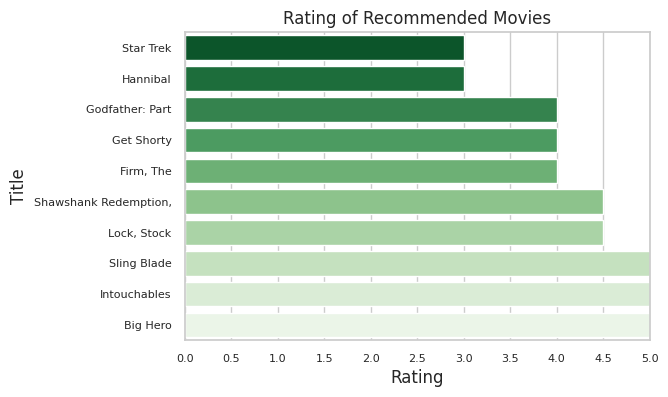

In [49]:
rm = recommended_movies.groupby('title')['rating'].max()
rt = rm.sort_values(ascending=False)

titles = rt.index
ratings = rt.values
palette = sns.color_palette("Greens", n_colors=len(titles))

plt.figure(figsize=(6, 4))
sns.barplot(x=ratings, y=titles, palette=palette)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.title('Rating of Recommended Movies')
plt.gca().invert_yaxis()
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.5), fontsize=8)

y_axis_labels = [' '.join(title.split()[:2]) for title in titles]
plt.yticks(range(len(titles)), y_axis_labels, fontsize=8)
plt.show()

## Model Development - Content Based Filtering

In [50]:
no_user_voted = movie_rating.groupby('movieId')['rating'].agg('count')
no_movies_voted = movie_rating.groupby('userId')['rating'].agg('count')

final_dataset = movie_rating.pivot(index='movieId',columns='userId',values='rating')
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


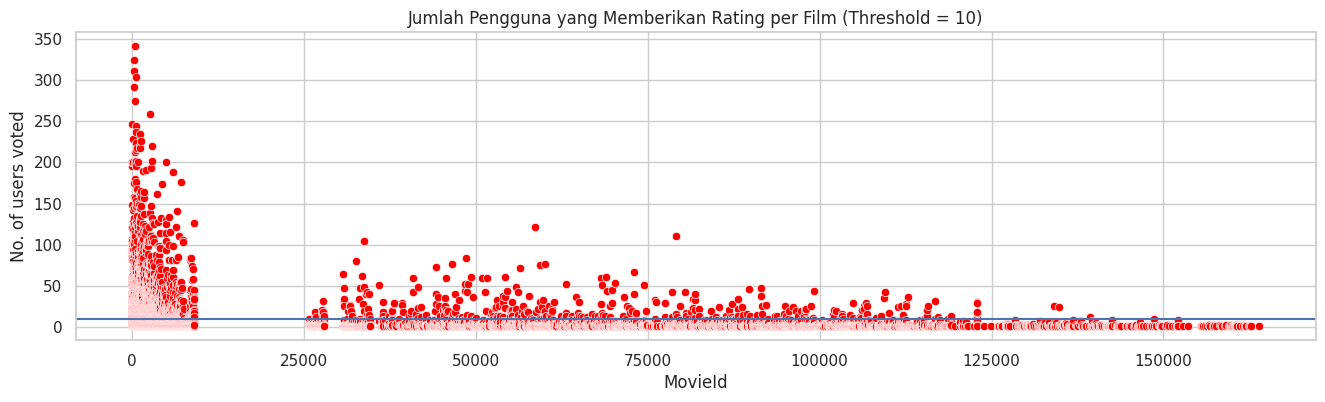

In [53]:
sns.set(style="whitegrid")

f, ax = plt.subplots(1, 1, figsize=(16, 4))

# Convert the Series to a DataFrame with column names 'MovieId' and 'No_of_users_voted'
no_user_voted_df = no_user_voted.reset_index()
no_user_voted_df.columns = ['MovieId', 'No_of_users_voted']

# Use the DataFrame as the data source and the column names for x and y
sns.scatterplot(data=no_user_voted_df, x='MovieId', y='No_of_users_voted', color='red')

plt.axhline(y=10, color='b')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.title('Jumlah Pengguna yang Memberikan Rating per Film (Threshold = 10)')
plt.show()

In [54]:
final_dataset = final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,2,3,4,5,7,8,12,13,15,17,...,655,656,658,659,660,662,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2.5,0.0,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


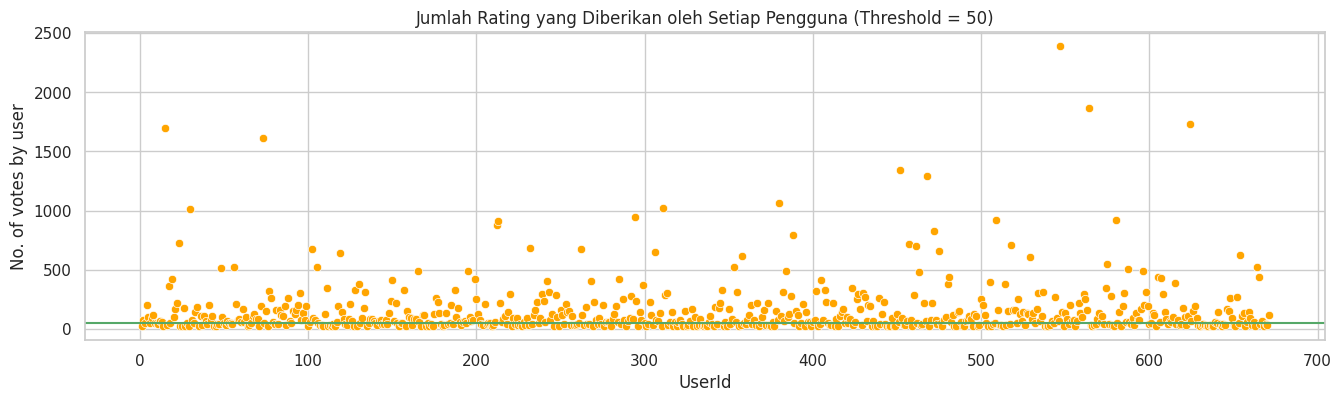

In [56]:
sns.set(style="whitegrid")

f, ax = plt.subplots(1, 1, figsize=(16, 4))

# Convert the Series to a DataFrame with column names 'UserId' and 'No_of_votes_by_user'
no_movies_voted_df = no_movies_voted.reset_index()
no_movies_voted_df.columns = ['UserId', 'No_of_votes_by_user']

# Use the DataFrame as the data source and the column names for x and y
sns.scatterplot(data=no_movies_voted_df, x='UserId', y='No_of_votes_by_user', color='orange')

plt.axhline(y=50, color='g')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.title('Jumlah Rating yang Diberikan oleh Setiap Pengguna (Threshold = 50)')
plt.show()

In [57]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [58]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=30, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

In [59]:
def recommend_movies_by_title(query_title):
    top_n = 10
    matched_movies = movie_rating[movie_rating['title'].str.contains(query_title, case=False, na=False)]

    if not matched_movies.empty:
        target_movie_id = matched_movies.iloc[0]['movieId']
        target_index = final_dataset.index[final_dataset['movieId'] == target_movie_id][0]

        distances, indices = knn.kneighbors(csr_data[target_index], n_neighbors=top_n + 1)

        recommendations = []
        for idx, dist in sorted(zip(indices.flatten(), distances.flatten()), key=lambda x: x[1])[1:]:
            rec_movie_id = final_dataset.iloc[idx]['movieId']
            movie_info = movie_rating[movie_rating['movieId'] == rec_movie_id].iloc[0]
            recommendations.append({
                'Title': movie_info['title'],
                'Genres': movie_info['genres'],
                'Rating': movie_info['rating']
            })

        return pd.DataFrame(recommendations, index=range(1, top_n + 1))

    return "No movies found. Please check your input"

In [61]:
rec = recommend_movies_by_title('Avengers')
rec

,Title,Genres,Rating
1,"Flintstones in Viva Rock Vegas, The","[Children, Comedy]",0.5
2,"Man in the Iron Mask, The","[Action, Adventure, Drama]",1.0
3,"Honey, I Blew Up the Kid","[Children, Comedy, Sci-Fi]",3.0
4,Two Weeks Notice,"[Comedy, Romance]",2.0
5,Bedazzled,[Comedy],2.0
6,Wild Wild West,"[Action, Comedy, Sci-Fi, Western]",2.0
7,Along Came Polly,"[Comedy, Romance]",3.5
8,Blade: Trinity,"[Action, Fantasy, Horror, Thriller]",3.0
9,"Cutting Edge, The","[Comedy, Drama, Romance]",3.0
10,Scary Movie 3,"[Comedy, Horror]",3.5


In [62]:
movie_relevant = 10
movie_recommendation = len(rec)
precision_score = movie_relevant / movie_recommendation

print("Precision: {:.2f}".format(precision_score))

Precision: 1.00
